In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title LIBRARY

!pip install pandas
!pip install nympy
!pip install tqdm
!pip install torch
!pip install torchvision
!pip install matplotlib
!pip install scikit-learn
!pip install torchsummary

ERROR: Could not find a version that satisfies the requirement nympy (from versions: none)
ERROR: No matching distribution found for nympy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing

In [3]:
# @title IMPORT_LIBRARY
import  torch
import  matplotlib.pyplot as plt
import numpy as np
from PIL import  Image
import os
from torchvision.transforms  import Compose , Resize,ToTensor,ToPILImage
from torch.utils.data import  Dataset,DataLoader
import cv2
from PIL import Image



In [19]:
# @title MAKE DATASET FOR CLASSIFICATION
class Falling_Dataset4Clss(Dataset):
  def __init__(self,root,type_data ,transform=None ):
    self.transform = transform
    self.root = root+'/'+type_data+'/'
    self.img_paths = []
    self.labels = []
    self.labels_name = ['fall', 'normal']
    with open(self.root+'labels.txt','r') as file:
      list_labels = file.read()

    for i in list_labels:
      if i == ' ':
        continue
      else:
        self.labels.append(int(i))
    self.img_paths = [self.root+'images/'+f for f in os.listdir(self.root+'/images')]
    self.img_paths.sort()




  def __len__(self):
    return len(self.labels)

  def __getitem__(self, index):
    image = Image.open(self.img_paths[index]).convert('RGB')
    if self.transform:
        image = self.transform(image)

    path_splited = list(self.img_paths[index].split('/'))
    name_img = path_splited[-1].split('.')[0]
    label = self.labels[int(name_img)]
    print(self.img_paths[index])
    print(name_img)
    return  image,torch.tensor(label)





In [20]:
# @title CHECK DATA_CLASSIFICATION
if __name__ == '__main__':
  dataset = Falling_Dataset4Clss(
      root = '/content/drive/MyDrive/BTL_TTCS/dataset_classification',
      type_data='train',
      transform=None
  )
  print(type(dataset.__getitem__(4)))
  # img, label = dataset.__getitem__(2000)
  # plt.imshow(img)
  # plt.axis('off')  # Tắt trục nếu muốn
  # plt.show()
  # print('label {}'.format(label))

/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/1000.jpg
1000
<class 'tuple'>


/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19006.jpg
19006


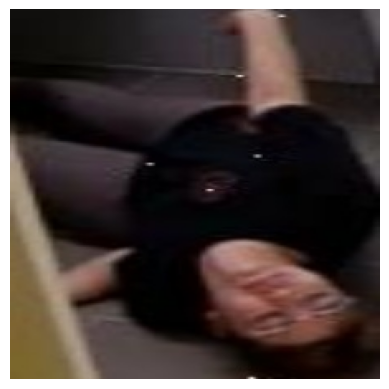

label 0
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19007.jpg
19007


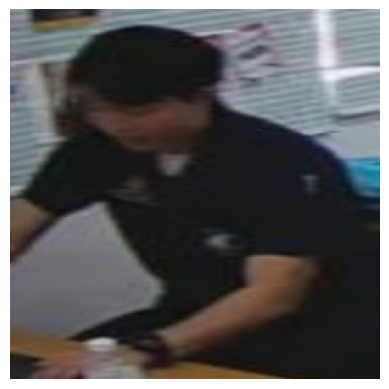

label 1
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19008.jpg
19008


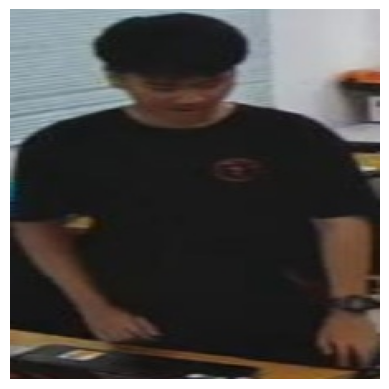

label 1
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19009.jpg
19009


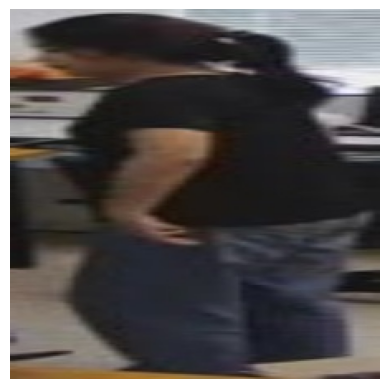

label 1
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/1901.jpg
1901


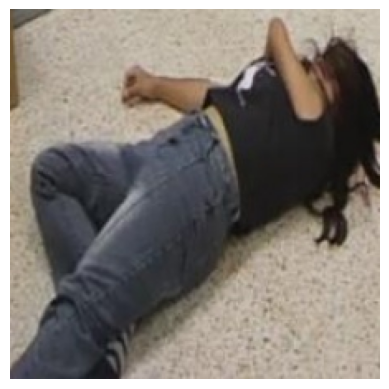

label 0
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19010.jpg
19010


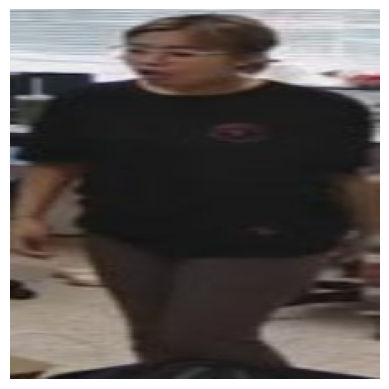

label 1
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19011.jpg
19011


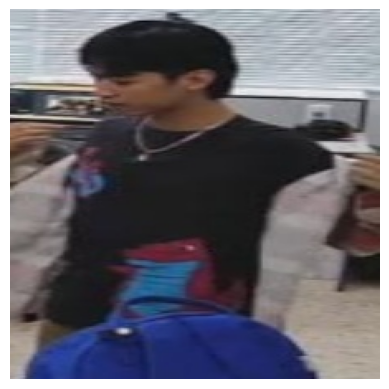

label 1
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19012.jpg
19012


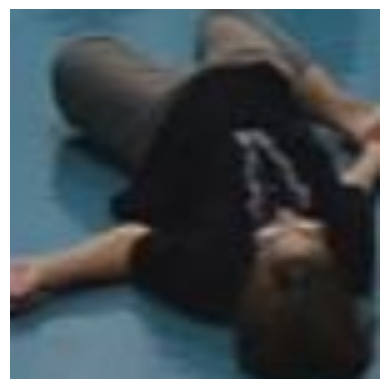

label 0
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19013.jpg
19013


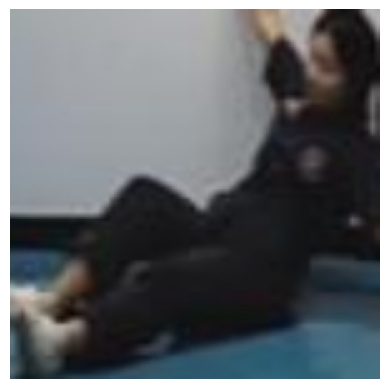

label 0
/content/drive/MyDrive/BTL_TTCS/dataset_classification/train/images/19014.jpg
19014


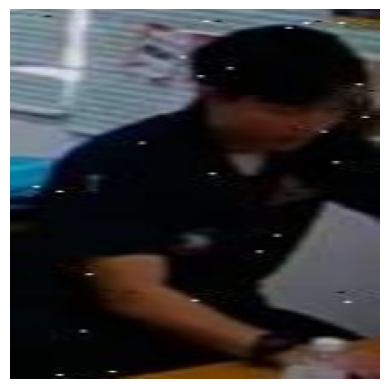

label 1


In [23]:
  for i in range(10010,10020):
    img, label = dataset.__getitem__(i)
    plt.imshow(img)
    plt.axis('off')  # Tắt trục nếu muốn
    plt.show()
    print('label {}'.format(label))